## Latar Belakang Masalah

1,  Efisiensi Operasional & Optimalisasi Armada Januari 2023

Perusahaan taksi NYC TLC ingin mengurangi waktu kosong (saat taksi tidak ada penumpang) dan meningkatkan jumlah perjalanan per hari untuk setiap taksi, untuk memaksimalkan pendapatan dan mengurangi biaya operasional seperti bahan bakar. sebagai seorang data analyst saya diminta untuk mengatasi permasalahan permasalahan tersebut

Analisis:

- Identifikasi Jam Sibuk dan Area Permintaan Tinggi: Kapan dan di mana permintaan taksi paling tinggi? Dengan menganalisis lpep_pickup_datetime, PULocationID, dan DOLocationID kita bisa menentukan hal itu

- Optimalisasi Rute: Rute mana yang paling sering ditempuh dan paling menguntungkan? Analisa pada PULocationID dan DOLocationID dapat membantu pengemudi memilih rute yang lebih efisien.

- Analisis Efisiensi Armada: Bagaimana cara mengukur dan meningkatkan efisiensi armada secara keseluruhan? Analisis Total Jam Produktif Harian dapat digunakan sebagai Key Performance Indicator (KPI) untuk melacak seberapa efektif armada digunakan dari waktu ke waktu.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('NYC TLC Trip Record.csv')
df.head(5)

C:\Users\hakia\AppData\Local\Temp\ipykernel_3300\1825678690.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


Data  "New York City TLC Trip Record Data Dictionary" ini menjelaskan berbagai fitur dan deskripsi terkait data catatan perjalanan taksi di New York City. 

Berikut adalah ringkasan fitur-fitur penting:

* VendorID: Kode penyedia LPEP (1=Creative Mobile Technologies, LLC., 2=VeriFone Inc.).

* lpep_pickup_datetime: Tanggal dan waktu argo mulai dihitung.

* lpep_dropoff_datetime: Tanggal dan waktu argo berhenti dihitung.

* Passenger_count: Jumlah penumpang (nilai dimasukkan oleh pengemudi).

* Trip_distance: Jarak tempuh perjalanan dalam mil.

* PULocationID: Zona Taksi TLC tempat argo mulai dihitung.

* DOLocationID: Zona Taksi TLC tempat argo berhenti dihitung.

* RateCodeID: Kode tarif akhir (1=Standar, 2=JFK, 3=Newark, 4=Nassau atau Westchester, 5=Tarif negosiasi, 6=Perjalanan kelompok).

* Store_and_fwd_flag: Menunjukkan apakah catatan perjalanan disimpan di memori kendaraan 
sebelum dikirim ke vendor (Y=disimpan, N=tidak disimpan).

* Payment_type: Kode numerik cara penumpang membayar (1=Kartu kredit, 2=Tunai, 3=Tidak ada biaya, 4=Sengketa, 5=Tidak diketahui, 6=Perjalanan dibatalkan).

* Fare_amount: Tarif berdasarkan waktu dan jarak.

* MTA_tax: Pajak MTA sebesar $0.50.

* Improvement_surcharge: Biaya tambahan $0.30 untuk perjalanan yang dihentikan secara spontan.

* Tip_amount: Jumlah tip (otomatis untuk kartu kredit, tidak termasuk tip tunai).

* Tolls_amount: Jumlah total semua biaya tol.

* Total_amount: Jumlah total yang dibebankan kepada penumpang (tidak termasuk tip tunai).

* Trip_type: Kode yang menunjukkan apakah perjalanan adalah "street-hail" (dihentikan secara spontan) atau "dispatch" (melalui pemesanan) (1=Street-hail, 2=Dispatch).

### Data Understanding

In [94]:
print(f"Jumlah baris dan kolom di Dataframe: {df.shape}")
df.info()
display(df.describe(), df.describe(include='object'))


Jumlah baris dan kolom di Dataframe: (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


Disini kita bisa mengetahui bahwa Data ini :

* Memiliki 20 kolom dengan total baris 68211


* Kolom ehail_fee memiliki jumlah data non-null 0 yang artinya data ini berisi NaN disetiap baris(Data dapat kita hapus)

* Kolom lpep_pickup_datetime, lpep_dropoff_datetime, dan store_and_fwd_flag memiliki tipe data object yang dimana itu tidak efisien. kita bisa mengubahnya kedalam data tipe yang lain seperti datetime dan boolean

* Baris dengan nilai kosong pada kolom RatecodeID, passenger_count, dan payment_type bisa kita hapus karena nilai pada kolom ini sangat krusial(tidak boleh kosong), sehingga menghapusnya penting karena data tidak lengkap dan tidak bisa dianalisis 

* Terdapat nilai minimum negatif dan kosong pada beberapa kolom, yang dimana itu mustahil. sebagai contoh: terdapat nilai negatif pada kolom fare_amount, dimana fare_amount adalah sejumlah tarif. menandakan adanya incosistent value 

* Pada kolom trip_distance terdapat nilai maksimum yang sangat ekstrim(120098.94 mil) dan ini jelas merupakan kesalahan data atau outlier 

* Nilai maksimum pada kolom RateCodeID mencapai 99 dimana data tersebut seharusnya berkisar antara 1-6

* Pada kolom fare_amount terdapat nilai max 490 dan kolom tip_amount max 222. yang dimana ini terlalu esktrem. Namun, dalam konteks data taksi NYC nilai setinggi ini bisa jadi merupakan data yang valid, meskipun sangat jarang terjadi


### Missing Values

In [95]:

df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [96]:
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

Disini saya simpulkan :

* Kolom trip_type memiliki jumlah nilai kosong(4334) yang hampir sama seperti kolom kosong lainnya, kemungkinan ada keterikatan dalam nilai tersebut
* Terdapat missing values di kolom "ehail_fee" dengan presentase 100%(kita bisa menghapusnya)

* Nilai missing values pada kolom tidak terlalu signifikan (<10%) artinya kita bisa memilih menghapusnya

* Terdapat kolom trip_type yang memiliki Missing Values sekitar 6.35% hampir sama dengan kolom kolom yang lain. Ada kemungkinan bahwa kolom ini memiliki kaitan dengan kolom kolom yang lain

* Jumlah missing values/Persentase pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, congestion_surcharge memiliki nilai yang sama yaitu 6.33% dengan jumlah missing values 4324. Disini saya simpulkan bahwa Missing Values ini bertipe MNAR karena dalam konteks data taksi ini ada beberapa skenario yang snagat munngkin menjadi penyebab dan semuanya mengarah ke MNAR. seperti : 

    1. Perjalanan Dibatalkan (Cancelled Trip): Pengemudi mengaktifkan meteran, tetapi penumpang membatalkan sebelum perjalanan dimulai. Akibatnya, data seperti fare_amount, trip_distance, dan payment_type memang seharusnya tidak ada. Data tersebut hilang karena sifat dari perjalanan itu sendiri (yaitu perjalanan yang batal).

    2. Kesalahan Sistem atau Meteran (System Error): Meteran taksi mengalami galat (error) dan gagal mencatat detail perjalanan. Data tersebut hilang karena ada masalah dengan proses perekaman data itu sendiri.

    3. Input yang Tidak Valid: Pengemudi mungkin secara tidak sengaja memulai dan menghentikan meteran tanpa adanya perjalanan yang sebenarnya.

Dalam semua kasus ini, hilangnya data bukanlah sebuah kebetulan acak. Ada penyebab mendasar yang berhubungan langsung dengan "kejadian" atau "event" perjalanan tersebut yang membuatnya tidak tercatat.




### Data Cleaning & Data Enrichment

#### 1. Mengambil Data hanya pada bulan januari 2023

In [97]:
# Mengambil data hanya untuk Januari 2023

start_date = '2023-01-01'
end_date = '2023-01-30'

df = df[(df['lpep_pickup_datetime'] >= start_date) & (df['lpep_pickup_datetime'] <= end_date)].copy()


#### 1. Mengkoreksi Tipe Data 

In [98]:
print("\nTAHAP 1: Koreksi Tipe Data...")
# Mengonversi kolom tanggal dari string menjadi tipe data datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Mengkonversi tipe data "store_and_fwd_flag" menjadi boolean
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': False, 'Y': True})



TAHAP 1: Koreksi Tipe Data...


#### 2. Menghapus kolom "ehail_fee" karena memiliki nilai kosong di setiap baris

In [99]:
# Menghapus kolom 'ehail_fee' karena 100% kosong
if 'ehail_fee' in df.columns:
    df.dropna(axis=1, how='all', inplace=True)

### 3. Menghapus kolom dengan nilai finansial negatif

In [100]:
# Hapus perjalanan dengan nilai finansial negatif
financial_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']
for col in financial_cols:
    if col in df.columns:
        df = df[df[col] >= 0]

#### 4. Menghapus data dengan "RatecodeID" tidak valid (di luar rentang 1-6)

In [101]:
# Hapus perjalanan dengan RatecodeID tidak valid (di luar rentang 1-6)
valid_rate_codes = [1, 2, 3, 4, 5, 6]
df = df[df['RatecodeID'].isin(valid_rate_codes)]


#### 5. Menghapus data dengan jumlah penumpang 0

In [102]:
# Catatan: Ini adalah asumsi bahwa perjalanan tanpa penumpang adalah tidak valid.
df = df[df['passenger_count'] > 0]

#### 6. Membuat kolom baru untuk filtering berdasarkan logika bisnis

In [103]:


# Membuat kolom 'trip_duration_minutes' untuk analisis dan filtering
df['trip_duration_minutes'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Membuat kolom 'pickup_hour' untuk analisis jam sibuk
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Membuat kolom 'day_of_week' untuk analisis pola mingguan
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

# Membuat kolom untuk menghitung kecepatan rata-rata (setelah durasi dan jarak > 0)
df['average_speed_mph'] = df['trip_distance'] / (df['trip_duration_minutes'] / 60)
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Menghindari nilai tak terhingga
df.dropna(subset=['average_speed_mph'], inplace=True)


# Filter kecepatan yang tidak masuk akal (misal: >100 mph atau <1 mph)
# Cara yang efektif untuk menangkap outlier pada `trip_distance` dan `trip_duration` sekaligus
df = df[(df['average_speed_mph'] > 1) & (df['average_speed_mph'] < 100)]


# Hapus perjalanan dengan durasi atau jarak tidak positif
df = df[df['trip_duration_minutes'] > 0]
df = df[df['trip_distance'] > 0]


# Membuat kolom 'route' untuk analisis rute
df['route'] = df['PULocationID'].astype(str) + ' → ' + df['DOLocationID'].astype(str)



C:\Users\hakia\AppData\Local\Temp\ipykernel_3300\3624193010.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True) # Menghindari nilai tak terhingga


#### 7. Menghapus baris yang masih memiliki nilai kosong setelah filtering

In [104]:
# Hapus baris yang masih memiliki nilai kosong di kolom-kolom penting setelah filtering
df.dropna(inplace=True)

#### 8. Check jumlah baris setelah Data Cleaning

In [105]:
print(f"Jumlah baris setelah filtering: {df.shape[0]}")

Jumlah baris setelah filtering: 55780


In [106]:
df_cleaned = df.copy()

#### Membuat Data Peta (Shapefile)

In [107]:
# Ganti 'path/to/your/NYC Taxi Zones.geojson' dengan lokasi file Anda

import pandas as pd
import geopandas as gpd

df = df_cleaned.copy()

path_to_your_geojson = 'NYC Taxi Zones.geojson' 

try:
    # Muat file GeoJSON lokal Anda
    taxi_zones = gpd.read_file(path_to_your_geojson)
    
    # Hitung jumlah penjemputan per lokasi
    pickup_counts = df['PULocationID'].value_counts().reset_index()
    pickup_counts.columns = ['location_id', 'jumlah_penjemputan']

    # Pastikan tipe data 'location_id' sama untuk penggabungan
    taxi_zones['locationid'] = taxi_zones['location_id'].astype(int) # Seringkali nama kolomnya 'locationid'
    pickup_counts['location_id'] = pickup_counts['location_id'].astype(int)

    # Gabungkan data peta dengan data jumlah penjemputan
    map_data = taxi_zones.merge(pickup_counts, left_on='locationid', right_on='location_id', how='left')
    map_data['jumlah_penjemputan'] = map_data['jumlah_penjemputan'].fillna(0)

    # Simpan sebagai file GeoJSON BARU yang sudah berisi data Anda
    output_map_file = 'Peta Hotspot.geojson'
    map_data.to_file(output_map_file, driver='GeoJSON')
    
    print(f"Data peta gabungan berhasil disimpan sebagai '{output_map_file}'")

except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{path_to_your_geojson}'. Mohon periksa kembali path file Anda.")


Data peta gabungan berhasil disimpan sebagai 'Peta Hotspot.geojson'


#### Membuat DataFrame baru untuk Ringkasan Perjalanan Harian

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan Anda menggunakan DataFrame yang sudah bersih
df = df_cleaned.copy()


# DataFrame 1: Data detail per perjalanan (sudah bersih)
df_perjalanan = df_cleaned.copy()

# DataFrame 2: Data ringkasan harian (yang baru kita buat)
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
df_harian = (df.groupby('pickup_date')['trip_duration_minutes'].sum() / 60).reset_index()
df_harian.columns = ['tanggal', 'total_jam_produktif']

# Nama file untuk masing-masing data
file_perjalanan = 'data_perjalanan.xlsx'
file_harian = 'data_harian.xlsx'

# Ekspor kedua DataFrame ke file CSV
df_perjalanan.to_excel(file_perjalanan, index=False)
df_harian.to_excel(file_harian, index=False)





#### 9. Pemeriksaan Outlier 

--- 1. Pengecekan via Ringkasan Statistik ---
Tabel .describe() untuk data yang sudah dibersihkan:


,trip_distance,fare_amount,trip_duration_minutes,average_speed_mph
count,55780.000000,55780.000000,55780.000000,55780.000000
mean,2.698622,15.885636,13.379064,11.888661
std,2.675524,11.872682,11.905205,5.539404
min,0.010000,0.000000,0.016667,1.007463
25%,1.200000,9.300000,7.266667,8.552486
50%,1.890000,12.800000,11.133333,10.615385
75%,3.170000,19.000000,16.633333,13.634348
max,66.180000,455.000000,1247.750000,96.000000



--- 2. Pengecekan via Visualisasi Box Plot ---


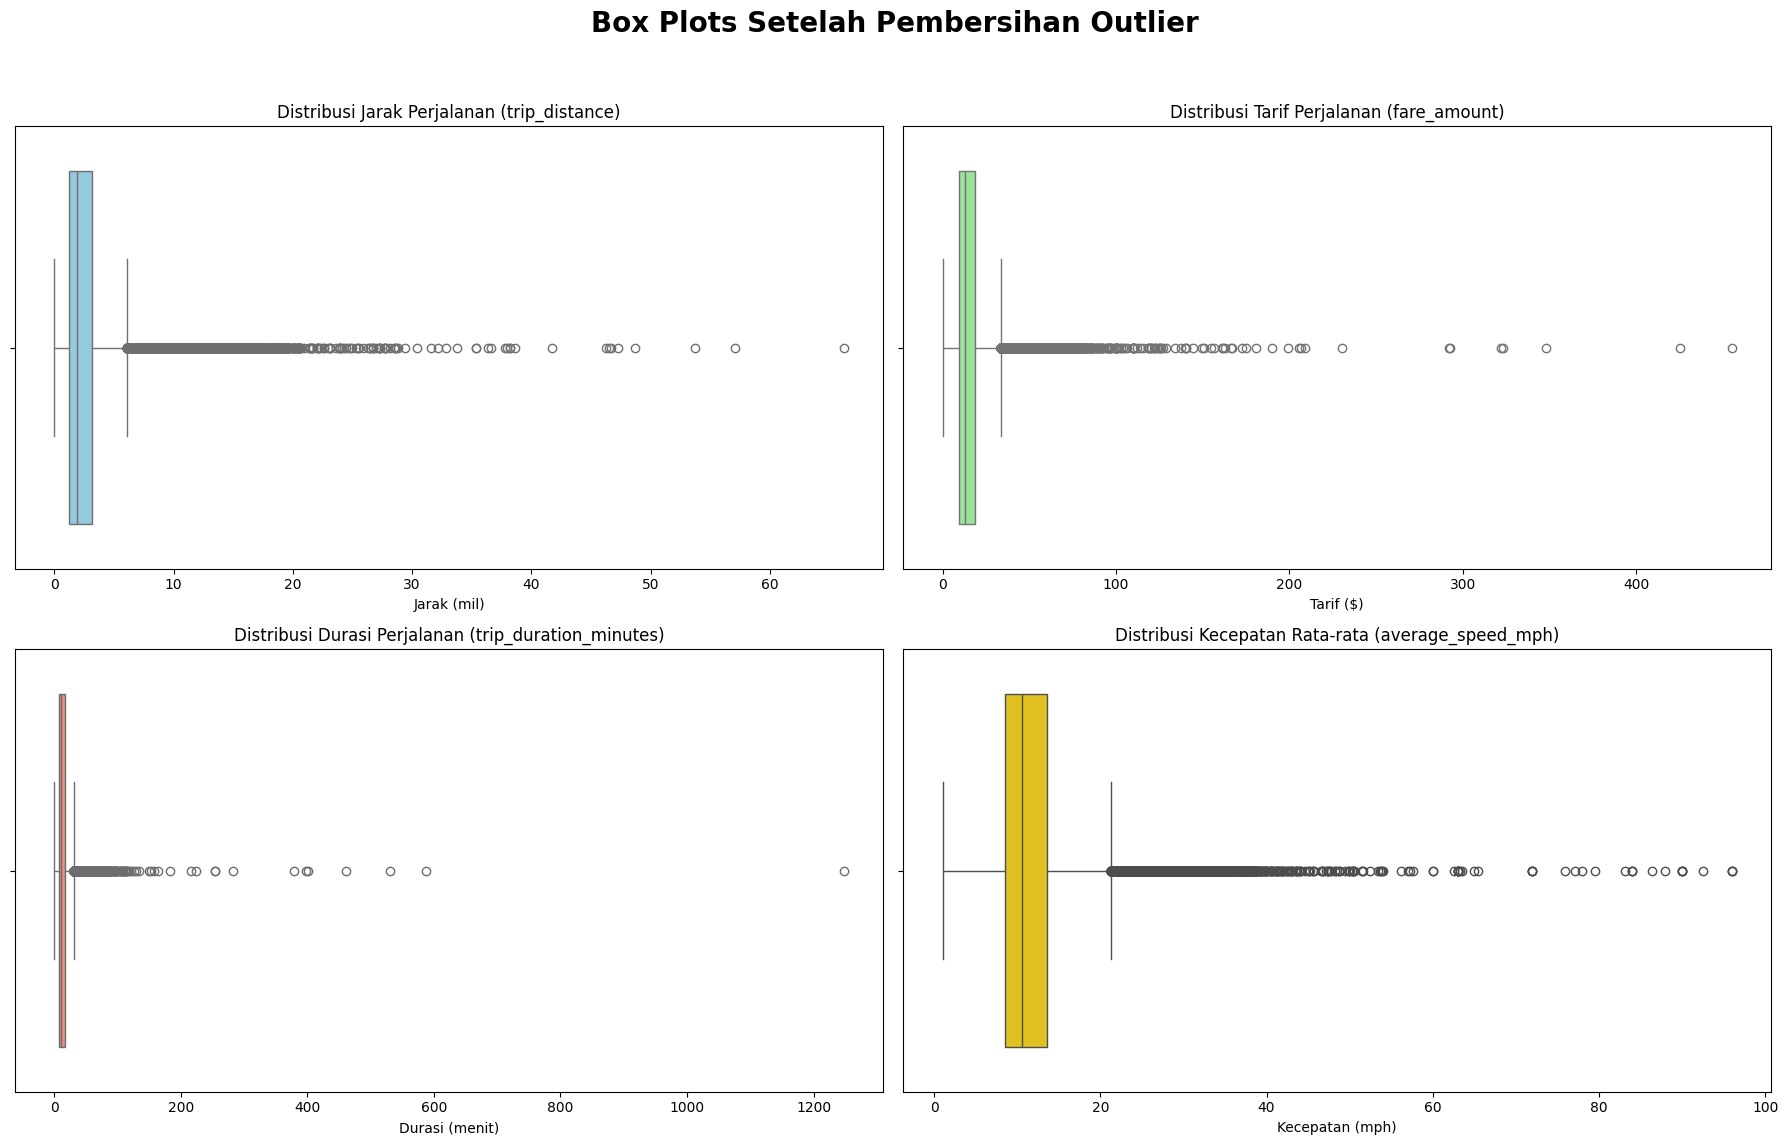

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan Anda menggunakan DataFrame yang sudah bersih
df_to_check = df_cleaned.copy()

print("--- 1. Pengecekan via Ringkasan Statistik ---")
print("Tabel .describe() untuk data yang sudah dibersihkan:")
# Perhatikan nilai min dan max pada kolom-kolom di bawah ini.
# Nilainya sekarang seharusnya sudah jauh lebih masuk akal.
display(df_to_check[['trip_distance', 'fare_amount', 'trip_duration_minutes', 'average_speed_mph']].describe())


print("\n--- 2. Pengecekan via Visualisasi Box Plot ---")
# Membuat beberapa box plot untuk melihat distribusi data secara visual

# Menyiapkan area plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Box Plots Setelah Pembersihan Outlier', fontsize=20, weight='bold')

# Box Plot untuk Trip Distance
sns.boxplot(ax=axes[0, 0], x=df_to_check['trip_distance'], color='skyblue')
axes[0, 0].set_title('Distribusi Jarak Perjalanan (trip_distance)')
axes[0, 0].set_xlabel('Jarak (mil)')

# Box Plot untuk Fare Amount
sns.boxplot(ax=axes[0, 1], x=df_to_check['fare_amount'], color='lightgreen')
axes[0, 1].set_title('Distribusi Tarif Perjalanan (fare_amount)')
axes[0, 1].set_xlabel('Tarif ($)')

# Box Plot untuk Trip Duration
sns.boxplot(ax=axes[1, 0], x=df_to_check['trip_duration_minutes'], color='salmon')
axes[1, 0].set_title('Distribusi Durasi Perjalanan (trip_duration_minutes)')
axes[1, 0].set_xlabel('Durasi (menit)')

# Box Plot untuk Average Speed
sns.boxplot(ax=axes[1, 1], x=df_to_check['average_speed_mph'], color='gold')
axes[1, 1].set_title('Distribusi Kecepatan Rata-rata (average_speed_mph)')
axes[1, 1].set_xlabel('Kecepatan (mph)')

# Merapikan layout dan menampilkan plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Secara visual grafik ini menunjukkan banyak sekali outlier, bahkan setelah pembersihan data 

- Menurut saya data ini masih sangat masuk akal dan sudah diduga,ini bukanlah data "Kotor" karena ini adalah Outlier Statistik

- Perbedaan Outlier Statistik vs. Outlier Anomali
Penting untuk membedakan dua jenis "outlier":

    1. Outlier Anomali (Kesalahan Data): Ini adalah nilai yang secara fisik atau logis tidak mungkin terjadi. Contoh: tarif negatif, jarak 100.000 mil, atau kecepatan 200 mph. Inilah yang telah berhasil kita bersihkan menggunakan filter berbasis logika (misalnya, fare_amount >= 0 atau average_speed < 100).

    2. Outlier Statistik (Data Langka): Ini adalah nilai yang valid dan nyata, tetapi secara matematis jarang terjadi dibandingkan dengan mayoritas data. Box plot sangat sensitif dalam menandai titik-titik ini.

- Penyebab Utama Banyaknya Outlier Statistik di Data Ini

    1. Penyebab utamanya adalah distribusi data yang sangat miring (heavily skewed distribution).

    Bayangkan pola perjalanan taksi di dunia nyata:

    Sebagian besar sekali perjalanan adalah perjalanan jarak pendek (misalnya, di bawah 8 mil atau 12 km).

    Hanya ada sedikit sekali perjalanan jarak jauh (misalnya, ke bandara atau kota sebelah).

    2. Karena mayoritas data (75% atau lebih) terkumpul pada rentang nilai yang sangat kecil,  maka:

    Interquartile Range (IQR) menjadi sangat sempit.

    batas atas dari box plot (Q3 + 1.5 * IQR) menjadi sangat pendek.

    Akibatnya, setiap perjalanan jarak jauh yang sah dan valid (misalnya, perjalanan 15 mil ke bandara JFK) secara matematis akan dianggap sebagai "outlier" oleh box plot karena berada jauh di luar rentang mayoritas perjalanan pendek.

    Hal yang sama berlaku untuk fare_amount (kebanyakan tarif rendah), trip_duration_minutes (kebanyakan durasi singkat), dan average_speed_mph.




#### 10. Analisis Korelasi

🔬 Melakukan Analisis Korelasi...


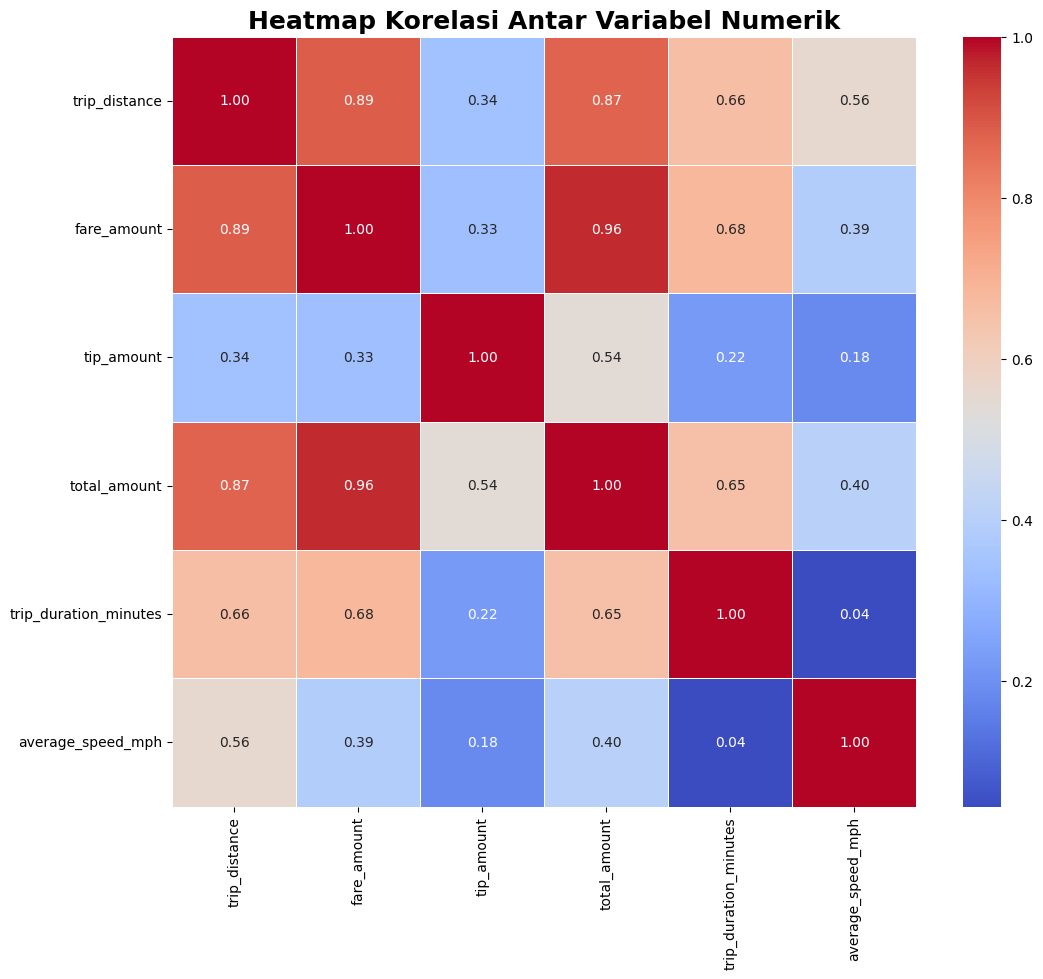

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan Anda menggunakan DataFrame yang sudah bersih
df = df_cleaned.copy()

print("🔬 Melakukan Analisis Korelasi...")

# 1. Pilih kolom numerik yang relevan untuk analisis korelasi
#    Kita tidak perlu memasukkan semua kolom, hanya yang paling penting.
correlation_cols = [
    'trip_distance',
    'fare_amount',
    'tip_amount',
    'total_amount',
    'trip_duration_minutes',
    'average_speed_mph'
]

# 2. Hitung matriks korelasi menggunakan metode .corr() dari pandas
correlation_matrix = df[correlation_cols].corr()

# 3. Buat heatmap menggunakan seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Menampilkan nilai korelasi di setiap sel
    cmap='coolwarm',     # Skema warna (merah untuk positif, biru untuk negatif)
    fmt='.2f',           # Format angka menjadi 2 desimal
    linewidths=.5
)

plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=18, weight='bold')
plt.savefig('correlation_heatmap.png')
plt.show()

Interpretasi :

1. Validasi Logika Bisnis yang Kuat 

Hal pertama yang paling menonjol adalah korelasi yang sangat kuat dan positif (warna merah pekat) antara variabel-variabel yang secara logika memang seharusnya berhubungan.

    1. trip_distance vs. fare_amount (0.88): Ini adalah validasi terpenting. Semakin jauh jarak perjalanan, semakin tinggi tarifnya. Korelasi yang sangat kuat ini menunjukkan data Anda konsisten.

    2. total_amount vs. fare_amount (0.96): Hubungan yang hampir sempurna. Ini wajar karena total_amount sebagian besar terdiri dari fare_amount.

Ini membuktikan bahwa proses pembersihan data telah berhasil mempertahankan struktur logis dari data.

2. Faktor Utama Penentu Tarif 

Meskipun sama-sama berhubungan dengan tarif, kita bisa melihat faktor mana yang lebih dominan.

    1. Jarak (trip_distance) adalah pendorong utama tarif dengan korelasi 0.88.

    2. Durasi (trip_duration_minutes) juga berpengaruh kuat (korelasi 0.68), yang mencerminkan komponen waktu dalam argo (misalnya saat terjebak macet).

Strategi untuk memaksimalkan pendapatan harus berfokus pada efisiensi untuk mendapatkan perjalanan dengan jarak tempuh yang optimal, bukan hanya perjalanan yang durasinya lama.

3. Perilaku Pemberian Tip yang Menarik 

    Korelasi antara tip_amount dengan fare_amount (0.33) dan total_amount (0.54) bersifat positif namun tidak sekuat yang dibayangkan.

Ini menunjukkan bahwa meskipun orang cenderung memberi tip lebih banyak pada perjalanan yang lebih mahal, jumlah tip tidak semata-mata ditentukan oleh harga. Faktor lain yang tidak ada dalam data, seperti kualitas layanan pengemudi dan kemurahan hati penumpang, memainkan peran yang sangat besar. Ini adalah peluang noneksplorasi  pengemudi dengan rasio tip/tarif yang tinggi mungkin adalah pengemudi terbaik

4. Temuan Tersembunyi tentang Kecepatan 

    Ada korelasi positif sedang antara average_speed_mph dan trip_distance (0.55).

Ini mungkin terdengar aneh, tetapi sangat masuk akal. Perjalanan jarak jauh cenderung memiliki kecepatan rata-rata yang lebih tinggi. Mengapa? Karena perjalanan jauh lebih mungkin melibatkan segmen di jalan tol atau jalan arteri di mana mobil bisa melaju lebih cepat, sementara perjalanan pendek seringkali hanya di dalam kota yang padat dan macet.

#### Data Visualisasi

📊 Memulai proses pembuatan visualisasi...
✅ Visualisasi 1 (Heatmap Permintaan) berhasil disimpan sebagai heatmap_demand.png


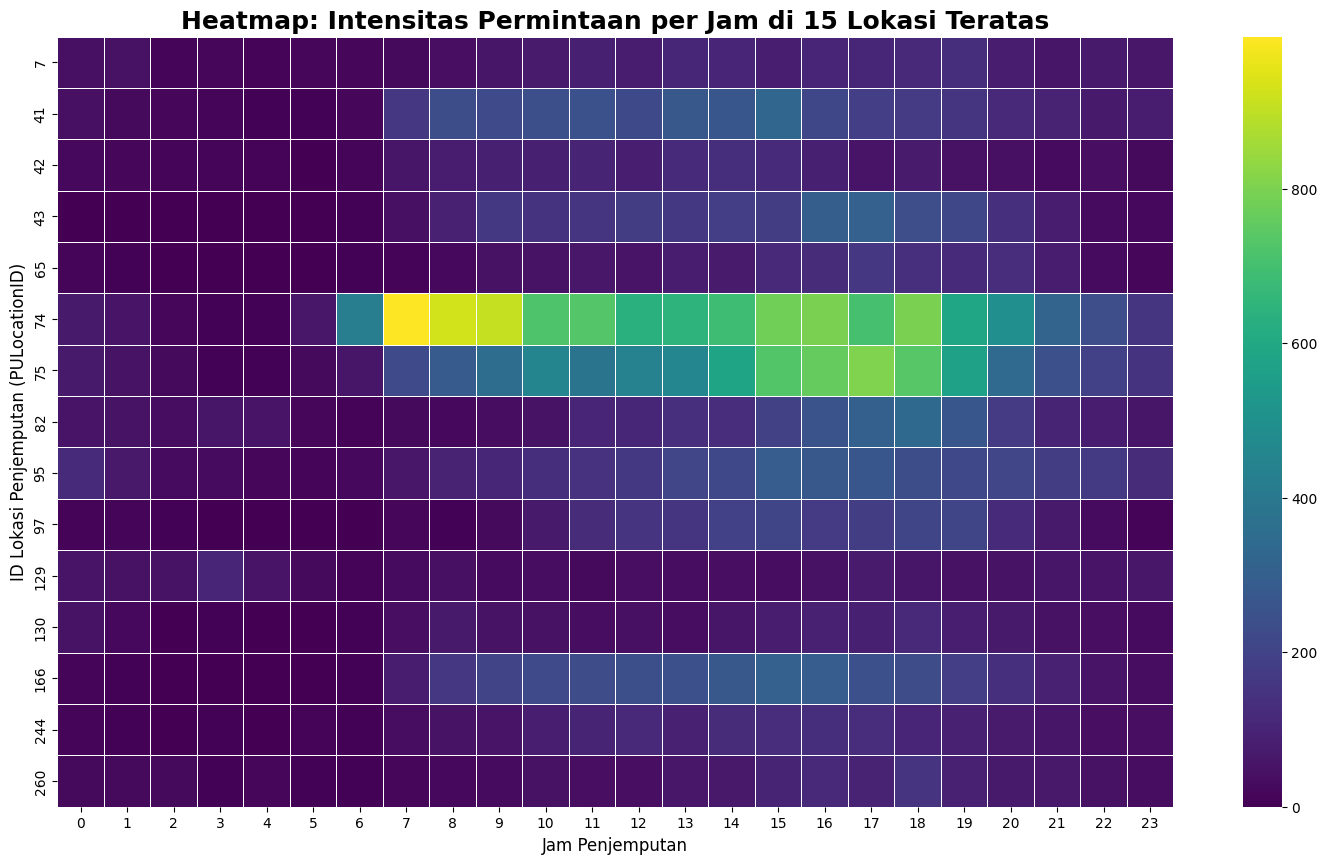

C:\Users\hakia\AppData\Local\Temp\ipykernel_3300\916462766.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profitable_routes.values, y=profitable_routes.index, palette="mako", orient='h')


✅ Visualisasi 2 (Rute Menguntungkan) berhasil disimpan sebagai profitable_routes.png


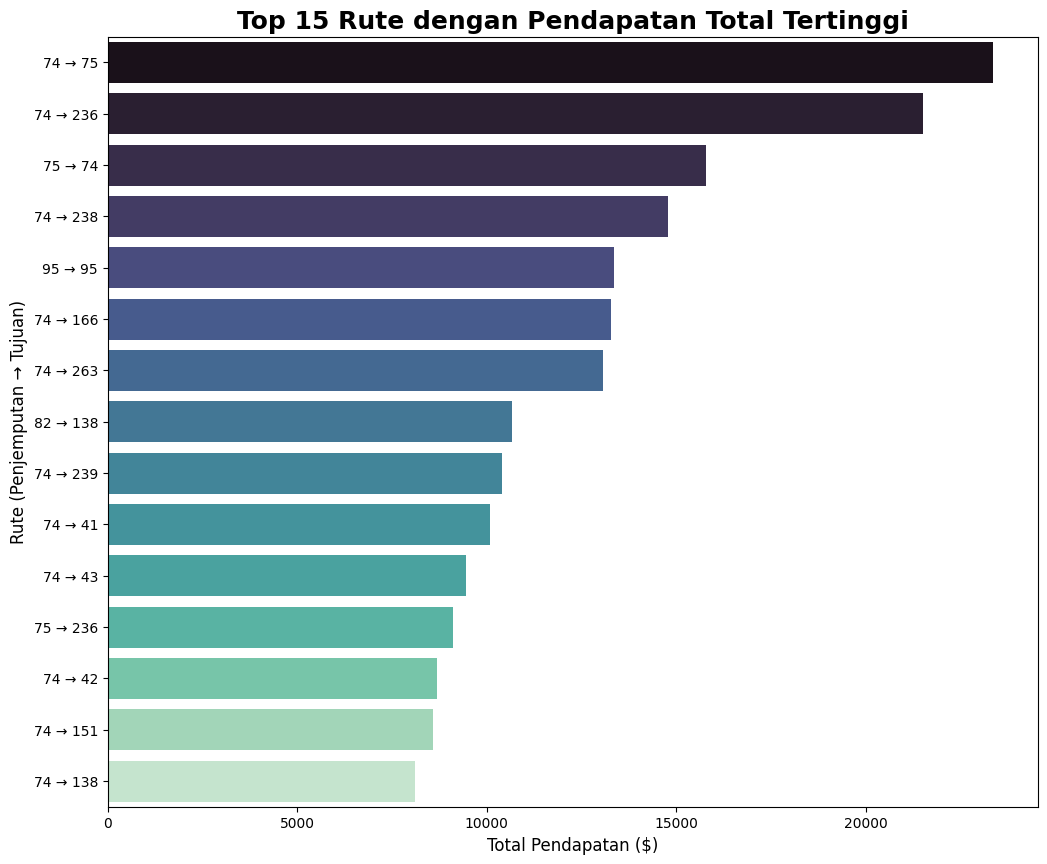

📊 Memvisualisasikan Tren Total Jam Produktif Harian...


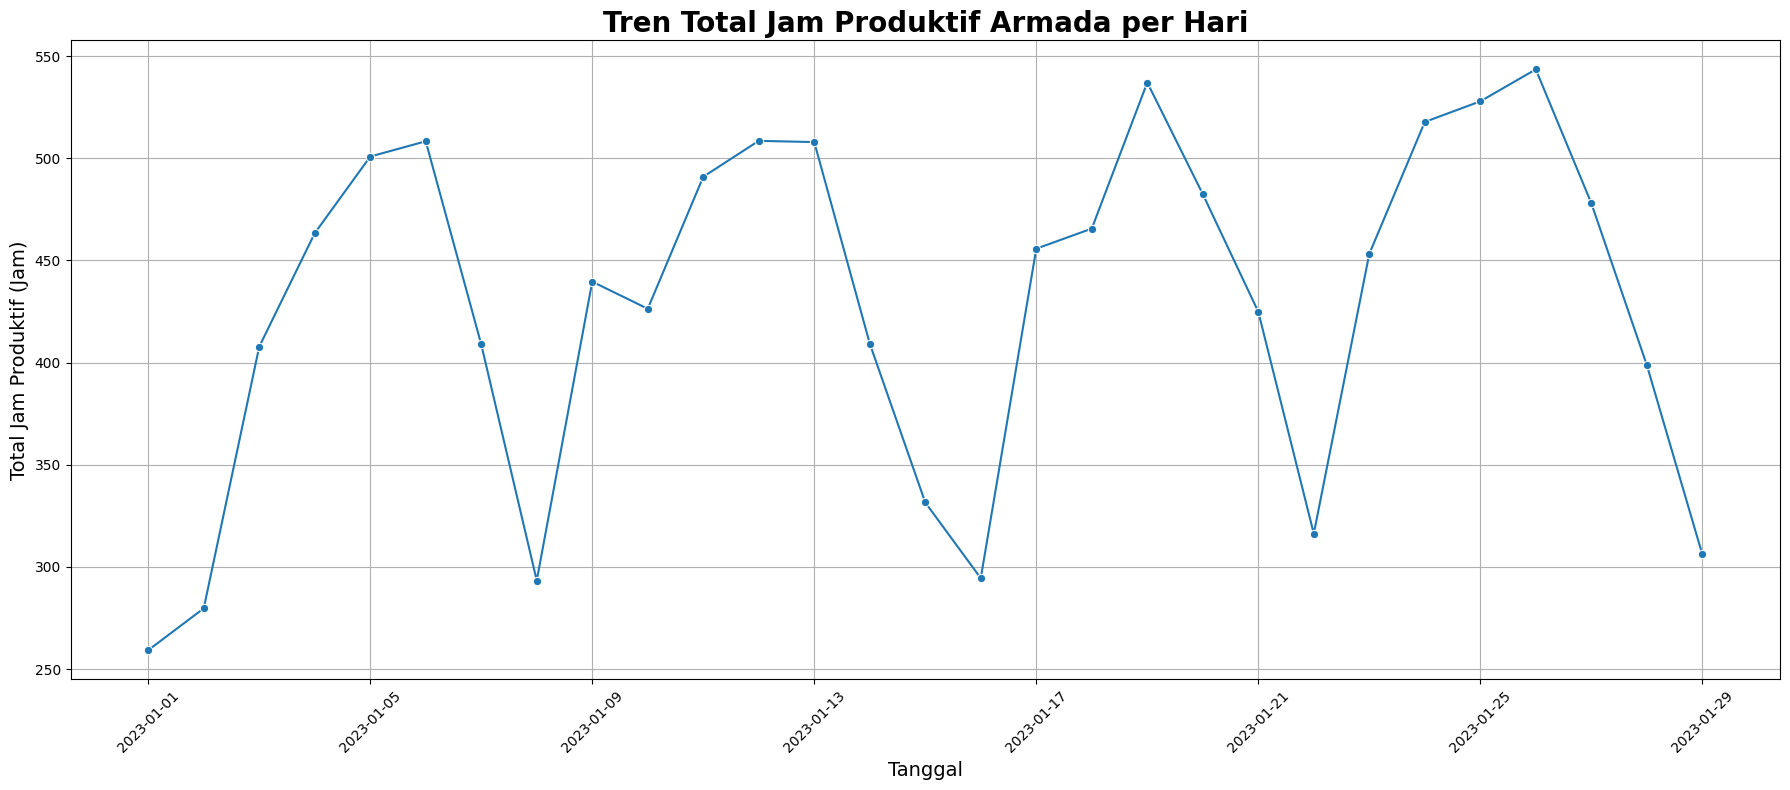

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan Anda menggunakan DataFrame yang sudah bersih dan telah dianalisis
df = df_cleaned.copy()

print("📊 Memulai proses pembuatan visualisasi...")

# --- VISUALISASI 1: Heatmap Jam Sibuk vs. Lokasi Penjemputan ---
# Tujuan: Menjawab "Kapan dan di mana permintaan paling tinggi?" secara simultan.

# 1. Cari 15 lokasi penjemputan teratas
top_locations = df['PULocationID'].value_counts().nlargest(15).index

# 2. Filter dataframe hanya untuk lokasi-lokasi tersebut
df_top_locations = df[df['PULocationID'].isin(top_locations)]

# 3. Buat pivot table untuk menghitung jumlah perjalanan per jam di setiap lokasi
heatmap_data = df_top_locations.pivot_table(
    index='PULocationID', 
    columns='pickup_hour', 
    values='VendorID',
    aggfunc='count',
    fill_value=0
)

# 4. Buat heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap="viridis", annot=False, linewidths=.5) # annot=False agar tidak terlalu ramai
plt.title('Heatmap: Intensitas Permintaan per Jam di 15 Lokasi Teratas', fontsize=18, weight='bold')
plt.xlabel('Jam Penjemputan', fontsize=12)
plt.ylabel('ID Lokasi Penjemputan (PULocationID)', fontsize=12)
plt.savefig('heatmap_demand.png')
print("✅ Visualisasi 1 (Heatmap Permintaan) berhasil disimpan sebagai heatmap_demand.png")
plt.show()




# 2. Hitung total pendapatan ('total_amount') untuk setiap rute
profitable_routes = df.groupby('route')['total_amount'].sum().nlargest(15)

# 3. Buat bar plot horizontal
plt.figure(figsize=(12, 10))
sns.barplot(x=profitable_routes.values, y=profitable_routes.index, palette="mako", orient='h')
plt.title('Top 15 Rute dengan Pendapatan Total Tertinggi', fontsize=18, weight='bold')
plt.xlabel('Total Pendapatan ($)', fontsize=12)
plt.ylabel('Rute (Penjemputan → Tujuan)', fontsize=12)
plt.savefig('profitable_routes.png')
print("✅ Visualisasi 2 (Rute Menguntungkan) berhasil disimpan sebagai profitable_routes.png")
plt.show()



print("📊 Memvisualisasikan Tren Total Jam Produktif Harian...")

# 1. Buat kolom baru untuk tanggal saja
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date

# 2. Hitung total durasi perjalanan (waktu produktif) per hari dalam jam
daily_productive_hours = (df.groupby('pickup_date')['trip_duration_minutes'].sum() / 60).reset_index()
daily_productive_hours.columns = ['tanggal', 'total_jam_produktif']

# 3. Membuat visualisasi grafik garis (line chart)
plt.figure(figsize=(18, 8)) # Memberikan ukuran yang lebih lebar agar mudah dibaca
sns.lineplot(
    data=daily_productive_hours, 
    x='tanggal', 
    y='total_jam_produktif', 
    marker='o', # Menambahkan titik untuk setiap hari
    linestyle='-'
)

# 4. Memberi judul dan label untuk kejelasan
plt.title('Tren Total Jam Produktif Armada per Hari', fontsize=20, weight='bold')
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Total Jam Produktif (Jam)', fontsize=14)
plt.xticks(rotation=45) # Memutar label tanggal agar tidak tumpang tindih
plt.grid(True) # Menambahkan grid untuk kemudahan membaca nilai
plt.tight_layout() # Merapikan layout

# Menyimpan dan menampilkan grafik
plt.savefig('tren_jam_produktif.png')
plt.show()

#### Kesimpulan dan Rekomendasi Bisnis

Analisis data perjalanan taksi ini memberikan bukti kuat bahwa efisiensi dan pendapatan dapat ditingkatkan secara signifikan dengan beralih dari strategi operasional yang reaktif menjadi proaktif dan berbasis data. Tiga area utama yang menjadi fokus adalah optimalisasi penempatan armada, fokus pada rute bernilai tinggi, dan penggunaan "Total Jam Produktif" sebagai metrik efisiensi utama.

1. Wawasan: Permintaan Sangat Terpusat dan Dapat Diprediksi
(Insight ini tetap valid dan tidak berubah)

Kesimpulan dari Data: Permintaan taksi tidak terjadi secara acak, melainkan sangat terkonsentrasi pada waktu dan lokasi tertentu. Visualisasi heatmap dan grafik jam sibuk menunjukkan bahwa permintaan memuncak pada jam sore hingga malam hari (pukul 17.00 - 20.00) dan pada akhir pekan (Jumat & Sabtu). Permintaan ini juga terpusat di beberapa lokasi penjemputan utama (hotspot).

Rekomendasi Bisnis:

Terapkan Dynamic Hotspot Alert: Kembangkan sistem sederhana untuk memberitahu pengemudi agar bergerak menuju lokasi-lokasi dengan permintaan tertinggi sesaat sebelum jam puncak tiba. Daripada mencari penumpang, kita "menjemput" permintaan.

Optimalkan Jadwal Pengemudi: Alokasikan lebih banyak armada yang beroperasi pada Jumat dan Sabtu malam, yang merupakan waktu paling profitabel.

Dampak: Mengurangi waktu kosong (idle time), meningkatkan jumlah perjalanan per pengemudi, dan menghemat biaya bahan bakar.

2. Wawasan: Profitabilitas Rute Lebih Penting Daripada Popularitas
(Insight ini juga tetap valid dan tidak berubah)

Kesimpulan dari Data: Analisis korelasi membuktikan bahwa pendapatan (fare_amount) sangat dipengaruhi oleh jarak perjalanan (trip_distance). Artinya, rute yang paling sering dilalui belum tentu yang paling menguntungkan. Rute yang lebih jauh, meskipun lebih jarang, bisa jadi menghasilkan pendapatan yang lebih besar.

Rekomendasi Bisnis:

Identifikasi "Rute Emas" (Golden Routes): Lakukan analisis untuk memetakan rute (pasangan Lokasi Jemput -> Lokasi Tujuan) yang menghasilkan total pendapatan tertinggi. Rute-rute ini adalah aset paling berharga perusahaan.

Program Insentif Rute: Berikan bonus kecil atau poin loyalitas bagi pengemudi yang melayani "Rute Emas" ini. Ini akan mendorong pengemudi untuk memprioritaskan perjalanan yang paling bernilai.

Dampak: Meningkatkan metrik kunci pendapatan per perjalanan, yang secara langsung meningkatkan profitabilitas keseluruhan.

3. Wawasan: "Total Jam Produktif" adalah KPI Efisiensi yang Sebenarnya


Kesimpulan dari Data: Analisis "Total Jam Produktif Harian" memberikan gambaran yang akurat tentang efisiensi armada secara keseluruhan. Grafik tren menunjukkan pola mingguan yang jelas, di mana armada mencapai puncak produktivitas pada akhir pekan dan menurun pada awal pekan. Metrik ini berhasil menangkap "denyut nadi" operasional bisnis.

Rekomendasi Bisnis:

Jadikan "Total Jam Produktif Harian" sebagai KPI Utama: Fokuskan tim operasional pada satu tujuan: meningkatkan angka KPI ini dari waktu ke waktu. Keberhasilan rekomendasi #1 dan #2 harus diukur dari kemampuannya untuk meningkatkan produktivitas di hari sepi pada grafik tren ini.

Langkah Berikutnya - Analisis Prediktif: Gunakan tren historis dari jam produktif ini sebagai dasar untuk membuat peramalan (forecasting) pendapatan dan kebutuhan armada di masa depan.

Dampak: Memberikan metrik yang jelas dan andal untuk melacak efisiensi, memungkinkan manajemen membuat keputusan strategis yang lebih baik, dan menciptakan model bisnis yang lebih ramping dan terukur.

In [112]:
df_cleaned.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_minutes,pickup_hour,day_of_week,average_speed_mph,route
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,False,1.0,166,143,1.0,2.58,14.9,...,1.0,24.18,1.0,1.0,2.75,11.016667,0,Sunday,14.051437,166 → 143
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,False,1.0,24,43,1.0,1.81,10.7,...,1.0,15.84,1.0,1.0,0.00,6.766667,0,Sunday,16.049261,24 → 43
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,False,1.0,41,238,1.0,1.30,6.5,...,1.0,10.20,1.0,1.0,0.00,5.816667,0,Sunday,13.409742,41 → 238
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,False,1.0,41,74,1.0,1.10,6.0,...,1.0,8.00,1.0,1.0,0.00,5.966667,0,Sunday,11.061453,41 → 74
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,False,1.0,41,262,1.0,2.78,17.7,...,1.0,22.95,2.0,1.0,2.75,17.550000,0,Sunday,9.504274,41 → 262
